# COVID-19 Vaccine Tweets Analysis

**Team Members:**
1. Muhammad Jawad Bashir (330295)
2. Rizki Haleemdeen (359407) 
3. Abdul Subhan (326966) 
4. Mariam (329693)

**Task:**
In this notebook, we analyzed a COOVID-19 vaccines tweets dataset. We explored different tweets' attributes and user demographics. Finally, we also did the sentiment analysis of tweets in order to check the dominant sentiment about Covid-19 vaccines.

It consists of following Sections and subsections:

1. Dataset Loading & Preprocessing
2. Visualizing & Exploring Tweet Attributes 
3. Visualizing & Exploring Tweet Attributes 
4. Sentiment Analysis & Visualizations
5. Concluded Insights

### 1. Importing Data & Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [104]:
df=pd.read_csv('vaccination_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8631 non-null   int64 
 1   user_name         8631 non-null   object
 2   user_location     6895 non-null   object
 3   user_description  8094 non-null   object
 4   user_created      8631 non-null   object
 5   user_followers    8631 non-null   int64 
 6   user_friends      8631 non-null   int64 
 7   user_favourites   8631 non-null   int64 
 8   user_verified     8631 non-null   bool  
 9   date              8631 non-null   object
 10  text              8631 non-null   object
 11  hashtags          6580 non-null   object
 12  source            8630 non-null   object
 13  retweets          8631 non-null   int64 
 14  favorites         8631 non-null   int64 
 15  is_retweet        8631 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 961.0+ KB


In [106]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

### 2. Data Preprocessing

#### A. Checking Account Verifications

In [107]:
df['user_verified']=df['user_verified'].apply(lambda x:'verified' if x==True else 'not_verified')

#### B. Analyzing Account Age

In [108]:
from datetime import date
df['today']=date.today()
df['user_created']=pd.to_datetime(df['user_created']).dt.year
df['today']=pd.to_datetime(df['today'])
df['today']=df['today'].dt.year
df['acc_age']= df['today']-df['user_created']

In [109]:
print(max(df['date']))
print(min(df['date']))

2021-06-01 10:50:54
2020-12-12 11:55:28


In [110]:
df['date']=pd.to_datetime(df['date'])

In [111]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

<ipython-input-111-0329bedfdd8d>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



#### C. Total Engagement = Retweets + Favorites

In [112]:
df['total_engagement']=df['retweets']+df['favorites']

#### D. Calculating Tweet Length

The tweet can't be longer than 280 characters
Analyzing Tweet lengths

In [113]:
df['tweet_lenght']=df['text'].apply(lambda x:len(x))
df['tweet_lenght'].describe()

count    8631.000000
mean      128.891322
std        20.589764
min        27.000000
25%       128.000000
50%       139.000000
75%       140.000000
max       151.000000
Name: tweet_lenght, dtype: float64

#### E. Tweet Length Classes (Short & Long)

In [114]:
df['tweet_length']=df['text'].apply(lambda x:'short' if len(x)<=130 else 'long')

#### F. Preprocessing Country location

In [115]:
 df['user_location'].value_counts()

London, England                   128
Malaysia                          126
India                             110
London                             90
Canada                             83
                                 ... 
Jersey C.I.                         1
Cabo San Lucas, Mexico              1
The Pacific Northwest...ahhhh!      1
South Lake Tahoe, CA                1
Somewhere                           1
Name: user_location, Length: 2519, dtype: int64

In [116]:
loc_df = df['user_location'].str.split(',',expand=True)
loc_df=loc_df.rename(columns={0:'first_loc',1:'second_loc'})

In [117]:
# Remove Spaces 
loc_df['second_loc'] = loc_df['second_loc'].str.strip()
# Rename States 
state_fix = {'Ontario': 'Canada','United Arab Emirates': 'UAE','TX': 'USA','NY': 'USA'
                  ,'FL': 'USA','England': 'UK','Watford': 'UK','GA': 'USA','IL': 'USA'
                  ,'Alberta': 'Canada','WA': 'USA','NC': 'USA','British Columbia': 'Canada','MA': 'USA','ON':'Canada'
            ,'OH':'USA','MO':'USA','AZ':'USA','NJ':'USA','CA':'USA','DC':'USA','AB':'USA','PA':'USA','SC':'USA'
            ,'VA':'USA','TN':'USA','New York':'USA','Dubai':'UAE','CO':'USA'}
loc_df = loc_df.replace({"second_loc": state_fix}) 
loc_df['second_loc'].value_counts()[:40]

USA                        891
UK                         557
Canada                     211
India                      202
Ireland                    101
UAE                         82
United Kingdom              77
Germany                     67
France                      37
Scotland                    27
Belgium                     27
South Africa                24
Pakistan                    20
a spot in this Universe     20
London                      18
MI                          17
Qatar                       17
Deutschland                 17
Malaysia                    17
Switzerland                 17
New South Wales             17
Nederland                   15
Australia                   15
Spain                       14
California                  12
Philippines                 12
Italy                       11
Wales                       11
Greece                      10
BC                          10
Québec                       9
Delhi                        9
Queensla

In [118]:
#df['fixed_loc'].

#### G. Hashtags Count

In [119]:
df['Hash'] = df['text'].apply(lambda word:word.count('#'))

In [120]:
df['Mentions'] = df['text'].apply(lambda word:word.count('@'))

#### H. Account Influence Categories (Followers)

In [121]:
df['user_followers'].value_counts()

2       55
1       48
0       45
106     41
3       38
        ..
2405     1
2397     1
4531     1
441      1
4103     1
Name: user_followers, Length: 3123, dtype: int64

In [122]:
df['acc_class'] = df['user_followers'].apply(lambda x:'Weak'if x<=100 else ('Normal' if 1000>=x>100 else 
                                                                       ('Strong' if 10000>=x>1000
                                                                        else 'Influencer')))
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,dayofweek,dayofyear,weekofyear,quarter,total_engagement,tweet_lenght,tweet_length,Hash,Mentions,acc_class
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009,405,1692,3247,not_verified,2020-12-20 06:06:44,...,6,355,51,4,0,97,short,1,0,Normal
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009,834,666,178,not_verified,2020-12-13 16:27:13,...,6,348,50,4,2,140,long,0,0,Normal
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020,10,88,155,not_verified,2020-12-12 20:33:45,...,5,347,50,4,0,140,long,6,0,Weak
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008,49165,3933,21853,verified,2020-12-12 20:23:59,...,5,347,50,4,2575,140,long,0,0,Influencer
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020,152,580,1473,not_verified,2020-12-12 20:17:19,...,5,347,50,4,0,135,long,2,2,Normal


#### I. Preprocessed DataFrame

In [123]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'today', 'acc_age', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter', 'total_engagement',
       'tweet_lenght', 'tweet_length', 'Hash', 'Mentions', 'acc_class'],
      dtype='object')

In [124]:
df=df[['user_name','text','date', 'acc_age','user_verified','retweets','favorites','total_engagement', 'day', 'tweet_length',
       'Hash', 'Mentions', 'acc_class','month']]
df_copy=df.copy()

df.head()

,user_name,text,date,acc_age,user_verified,retweets,favorites,total_engagement,day,tweet_length,Hash,Mentions,acc_class,month
0,Rachel Roh,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,12,not_verified,0,0,0,20,short,1,0,Normal,12
1,Albert Fong,While the world has been on the wrong side of ...,2020-12-13 16:27:13,12,not_verified,1,1,2,13,long,0,0,Normal,12
2,eli🇱🇹🇪🇺👌,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45,1,not_verified,0,0,0,12,long,6,0,Weak,12
3,Charles Adler,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59,13,verified,446,2129,2575,12,long,0,0,Influencer,12
4,Citizen News Channel,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19,1,not_verified,0,0,0,12,long,2,2,Normal,12


Saving the Preprocessed Dataset for usage in Tableau

In [125]:
#df.to_csv(r'PreprocessedData.csv', index = False)

# Data Visualization

### 1. Exploring Tweet Attributes

##### a. Tweet Length

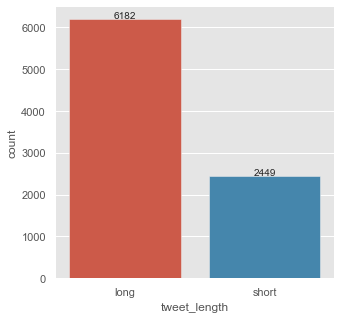

In [126]:
plt.figure(figsize = (5, 5))
s_graph = sns.countplot(x = 'tweet_length', data = df,order = df['tweet_length'].value_counts().index)
i=0

for p in s_graph.patches:
    height = p.get_height()
    s_graph.text(p.get_x()+p.get_width()/2., height + 20,df['tweet_length'].value_counts()[i],ha="center")
    i+=1
plt.show()

##### b. Tweet Length vs HashTag

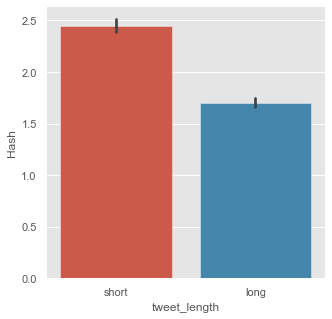

In [127]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['tweet_length'],y=df['Hash'],data=df);

##### c. Tweet Length vs Mentions

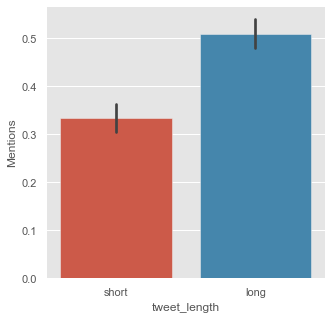

In [128]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['tweet_length'],y=df['Mentions'],data=df);

##### d. Verified vs Non Verified Users

In [129]:
df['user_verified'].value_counts()

not_verified    7822
verified         809
Name: user_verified, dtype: int64

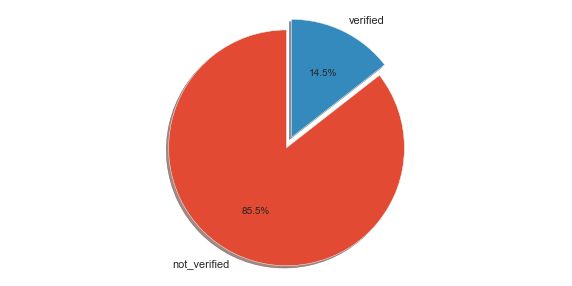

In [130]:
labels = 'not_verified', 'verified'
sizes = [1888, 319]
explode = (0.1, 0)  
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.axis('equal');

**Only 14.5% tweets are from verified users.**

### 2. Exploring User Attributes & Demographics

##### a. Account Type vs Engagements

In [131]:
class_eng = df.groupby('acc_class',as_index=False).agg({'total_engagement':'sum',})

In [132]:
fig = px.bar(class_eng,
             x='acc_class',
             y='total_engagement',
             color='total_engagement',
             color_continuous_scale='jet',
             title='Engagement By Account Type')
fig.show()

##### b. User Tweets Timeseries Analysis

In [133]:
line = df.groupby('date',as_index=False).agg({'total_engagement':'sum'})
fig = go.Figure()
fig.add_trace(go.Scatter(x=line.date, y=line.total_engagement,
                    mode='lines+markers'))

##### c. Exploring User Engagements in December
In the last time series analysis, we found that 12 December, 2020 has the toppest engagement, we searched about the fact behind that and found the following insight.

**A Hidden INSIGHT:  Most of the tweet engagements about vaccination are on December 11th as First COVID-19 Vaccine was approved for public usage by FDA (USA). So, you can see December 12 has the toppest Engagement Count about COVID-19 Vaccine.**

Here's the news:
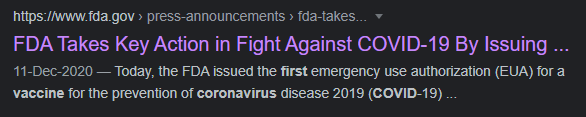

In [134]:
december=df.loc[df['month']==12]
day_december = december.groupby('day',as_index=False).agg({'total_engagement':'sum'})

fig = px.scatter(day_december,
                 x='day',
                 y='total_engagement',
                 color_continuous_scale='Rainbow',
                 color='total_engagement',
                 size='total_engagement',
                 title='Most engaged days in December')
fig.show()


**INSIGHT: Most of the engagements were from 12 to 14 December.**

##### d. Top Account Engagements

In [135]:
ret = df.groupby('user_name',as_index=False).agg({'retweets':'sum'}).sort_values('retweets',ascending=False).head(10)
like = df.groupby('user_name',as_index=False).agg({'favorites':'sum'}).sort_values('favorites',ascending=False).head(10)
tot_eng = df.groupby('user_name',as_index=False).agg({'total_engagement':'sum'}).sort_values('total_engagement',ascending=False).head(10)


fig = px.bar(tot_eng,
             x='user_name',
             y='total_engagement',
             color='total_engagement',
             color_continuous_scale='Rainbow',
             title='Top Engaging Users')
fig.show()

##### e. Account Engagement vs Account Age

In [136]:
age=df.groupby('acc_age',as_index=False).agg({'total_engagement':'sum'})
px.line(age,x='acc_age',y='total_engagement',labels={'x':'age','y':'engagement'}, title = "Account Engagement vs Account Age")

**INSIGHT: Most of the active users has 12 years old account**

In [137]:
df3=pd.DataFrame(loc_df['second_loc'].value_counts()[:20]).reset_index()

#####  f. User Locations

In [138]:
fig = px.choropleth(df3, locations = df3['index'],
                    color = df3['second_loc'],locationmode='country names',hover_name = df3['second_loc'], 
                    color_continuous_scale = px.colors.sequential.Rainbow)
fig.update_layout(title='User Location Tracking')
fig.show()

**INSIGHT: Most of the Users are from USA**

# Tweets Sentiment Analysis

##### Getting keywords out of tweets

In [139]:
tweets = df['text']

In [140]:
all_sentences = []

for word in tweets:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

##### Removing Punctuation

In [141]:
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

##### Stemming

In [142]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

##### Top Mentioned Keywords

NOTE: The following module takes some time for loading

In [143]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [144]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [145]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

**The following figure is Interactive**

In [146]:
df = df[:20,]
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

##### Top Mentioned Organizations

In [147]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [148]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [149]:
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000

In [150]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

In [151]:
df = df7[:20,]
plt.figure(figsize=(10,5))
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

<Figure size 720x360 with 0 Axes>

# Sentiments Analysis using TextBlob

Here we'll perfrom the Sentiment Analysis of Tweets using TextBlob, that uses a Machine Learning algortihm "Naive Bayes". First, we'll tokenize our text and then categorize the tweets into three types of sentiments, based on their polarity:
1. Negative
2. Neutral
4. Positive

##### Removing all the unnecessary characters from the tweets

In [152]:
features=tweets.values

In [153]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

##### Step-1: Calculating Polarity

In [154]:
df3=pd.DataFrame()
df3['Tweets']=processed_features

In [155]:
from textblob import TextBlob
from wordcloud import WordCloud

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Creating new column with calculated 'Polarity' values
df3['Polarity'] = df3['Tweets'].apply(getPolarity)

# Calculated Polarity
df3.head()

,Tweets,Polarity
0,same folks said daikon paste could treat cytok...,0.00
1,while the world has been on the wrong side of ...,-0.50
2,coronavirus sputnikv astrazeneca pfizerbionte...,0.00
3,facts are immutable senator even when you re n...,-0.05
4,explain to me again why we need vaccine borisj...,0.00


##### Step 2: Categorizing Tweet sentiment  on the basis of it's polarity score
1. Polarit < 0 - Negative Sentiment
2. Polarit = 0 - Neutral Sentiment
3. Polarit > 0 - Positive Sentiment

In [156]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

,Tweets,Polarity,Analysis
0,same folks said daikon paste could treat cytok...,0.000000,Neutral
1,while the world has been on the wrong side of ...,-0.500000,Negative
2,coronavirus sputnikv astrazeneca pfizerbionte...,0.000000,Neutral
3,facts are immutable senator even when you re n...,-0.050000,Negative
4,explain to me again why we need vaccine borisj...,0.000000,Neutral
...,...,...,...
8626,uae students aged 12 and above have started t...,-0.033333,Negative
8627,antibodies found in breast milk of women 6 we...,0.433333,Positive
8628,covid pfizer and astrazeneca jabs effective ag...,0.600000,Positive
8629,good news on covid19 vaccines protection amp e...,0.350000,Positive


In [157]:
Neutral = len(df3[df3['Analysis']=='Neutral'])
Negative = len(df3[df3['Analysis']=='Negative'])
Positive = len(df3[df3['Analysis']=='Positive'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]

import plotly.graph_objects as go
colors = ['red','green', 'blue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='grey', width=1)))

**This Pie graph depicts the ration of different sentiments in Tweets**

<AxesSubplot:xlabel='acc_class', ylabel='count'>

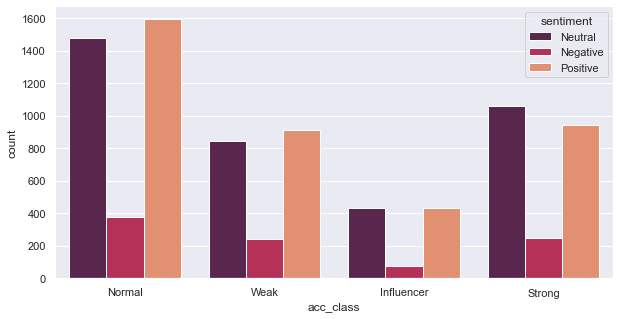

In [159]:
df_copy['sentiment'] = df3['Analysis']

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x=df_copy['acc_class'],data=df_copy,hue=df_copy['sentiment'],palette="rocket")

**Account Type "Normal (<1000 followers) has the highest positive and negative sentiment as compared to other account types.**

In [160]:
sen_eng = df_copy.groupby('sentiment',as_index=False).agg({'total_engagement':'sum'})
fig = px.bar(sen_eng, x='total_engagement', y='sentiment',
             hover_data=['total_engagement'], color='total_engagement', height=400)
fig.show()

**Here we can see that tweets with positive sentiment got the top engagements, that means public reaction was positive about the COVID Vaccines**

# Conclusion 

**Tweet Attributes:**
1. Average Tweet length is 128 characters. Most of the tweets are long (>128 characaters)
2. There's very less amount of verified accounts. Around 85% of the accounts are unverified (No Blue Tick).
3. Tweets with shorter length has more hashtags and less mentions.

**User Demographics & Attributes:**
1. 12 years old twitter accounts has the top engagement (20,752)
2. An account named as "Anita Anand" got the Highest engagements 
3. Most of the accounts in our dataset are 1 or 3 years old.
4. Most of the tweets are from USA, and then Canada.

**Some Hidden Insights:**
1. The most engaged tweets are from "Normal" Account types (Followers 1k - 10k). 2nd Most Engagement were achieved by     Influencers (Followers > 10k).
2. Most of the engagements are in December 2020 & January 2021.
3. The top mentioned vaccine is 'Pfizer Bio N Tech'. The other top mentioned vaccine is Astra Zanica (British Vaccine)
4. December 12, 2020 is the top engagement day, followed by the News when FDA approved the First COVID-19 vaccine for public trails. FDA approval was given on December 11, 2020.

**Sentiment Analysis Insights:**
1. 44.9% Tweets are Positive, 44.2% of the Tweets are Neutral and only around 10% of the tweets are Negative, which shows that overall public sentiment is "Positive and Neutral" about the COVID-19 vaccines
2. Lastly, we observed that Positive Tweets got the Highest Engagement from users, followed by Neutral ones. Negative Tweets about covid vaccine got the lowest engagement from twitter users.